In [1]:
### If Google Colab
!git config --global user.email "sjs.shamsi@gmail.com"
!git config --global user.name "SJShamsi"

from google.colab import drive
drive.mount('/content/drive')

Thesis_Files = '/content/drive/MyDrive/Thesis_Files/'

Mounted at /content/drive


In [12]:
### Importing common items
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from fastai.vision.all import *
from fastai.callback.tracker import SaveModelCallback

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['axes.grid'] = False

In [15]:
dmdt_by_Name_Band_file = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_linear_bins.pkl'
# dmdt_by_Name_Band_file = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_equivalent_bins_LS.pkl'

nxbins, nybins = 51, 51
dm_bins = np.linspace(-1, 1, nybins)
dt_bins = np.linspace(0, 1160, nxbins)

# dm_bins = np.load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dm_bins.npy')
# dt_bins = np.load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dt_bins.npy')

def numpy_to_pil(numpy_array):
    numpy_array = (numpy_array - numpy_array[:, :, :-1].min()) / (numpy_array[:, :, :-1].max() - numpy_array[:, :, :-1].min())
    numpy_array[:, :, 2] = np.zeros_like(numpy_array[:, :, 2])
    return PILImage.create(Image.fromarray((numpy_array * 255).astype(np.uint8)))

def norm(numpy_array):
    numpy_array = (numpy_array - numpy_array[:, :, :-1].min()) / (numpy_array[:, :, :-1].max() - numpy_array[:, :, :-1].min())
    numpy_array[:, :, 2] = np.zeros_like(numpy_array[:, :, 2])
    return numpy_array

Let's understand our distribution a little better.

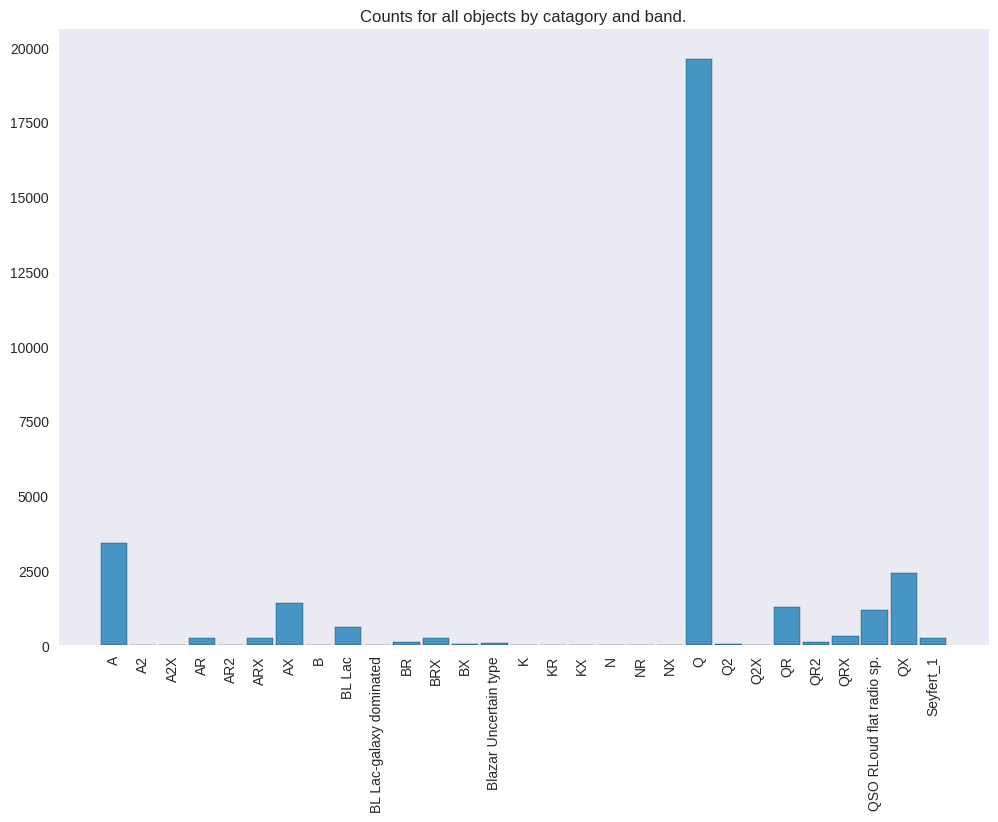

In [16]:
### plotting the distribution
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
type_array = dmdt_by_Name_Band['type'].to_numpy()

plt.figure(figsize=(12,8))

counts, bin_edges, _ = plt.hist(type_array, bins=len(set(type_array)), edgecolor='black', alpha=0.7, align='mid', rwidth=0.9)

categories = sorted(set(type_array))
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.xticks(bin_centers, labels=categories, rotation=90)
plt.title('Counts for all objects by catagory and band.')

plt.show()

del type_array, counts, bin_edges, dmdt_by_Name_Band

We'll only consider the Q, QR, and QX catagories, while watching out for that large diaparity!

In [17]:
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['type'].isin(['Q', 'QR', 'QX'])]
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['band'] == 'rg']
dmdt_by_Name_Band = dmdt_by_Name_Band.drop(columns=['n_good_det', 'band', 'hist_p_scale'])
dmdt_by_Name_Band

,name,type,histogram
6565,1WGA J16290+3724A,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
6566,2MASX J15371580+5829336,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
6567,2QZ J095248.7+004930,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 7.221780891167762e-05, 0.0]..."
6568,2QZ J095543.3+010536,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0001321527686005022, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0002925687536571094, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0001321527686005022, 0.0002925687536571094, 0.0], [0.0, 0.0002925687536571094, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ..."
6569,2QZ J100058.3+000530,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
...,...,...,...
31553,XBS J104509.3-012442,QX,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0006802721088435374, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0006802721088435374, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0013605442176870747, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0007855459544383347, 0.0], [0.0, 0.00039277297721916735, 0.0], [0.0, 0.0003927729772191673..."
31554,XLSS J022249.5-051452,QX,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 

### Running Resnet34 on it

In [18]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

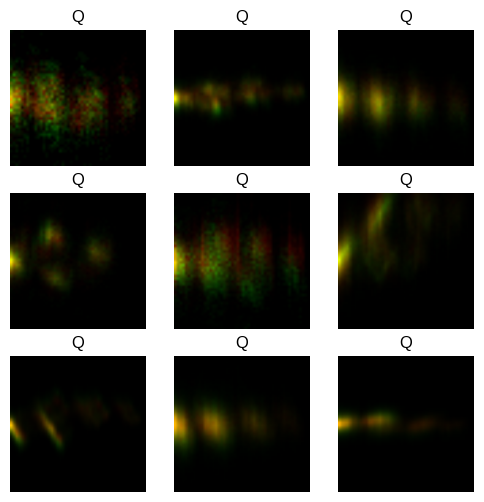

In [19]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 183MB/s]


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.0020892962347716093


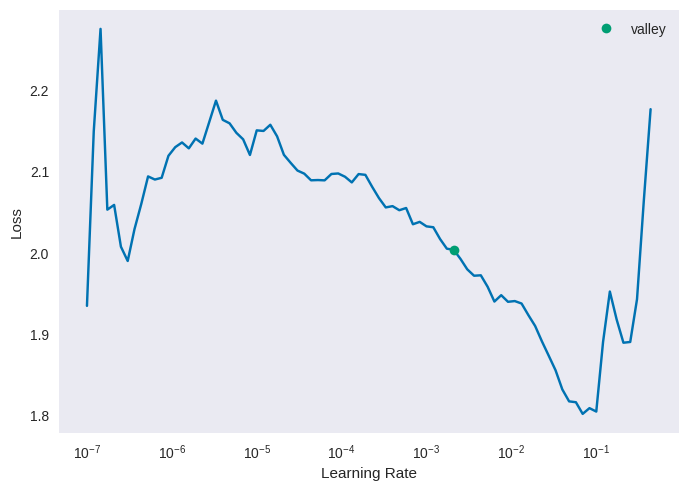

In [20]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [21]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_individual_class_backgrounds_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.633547,0.613293,0.820391,0.179609,01:27


Better model found at epoch 0 with valid_loss value: 0.6132925152778625.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.546242,0.540518,0.837599,0.162401,01:53
1,0.545629,0.541502,0.838245,0.161755,01:52
2,0.519828,0.547496,0.835879,0.164121,01:52
3,0.511372,0.549635,0.839750,0.160250,01:50


Better model found at epoch 0 with valid_loss value: 0.5405175685882568.
No improvement since epoch 0: early stopping


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


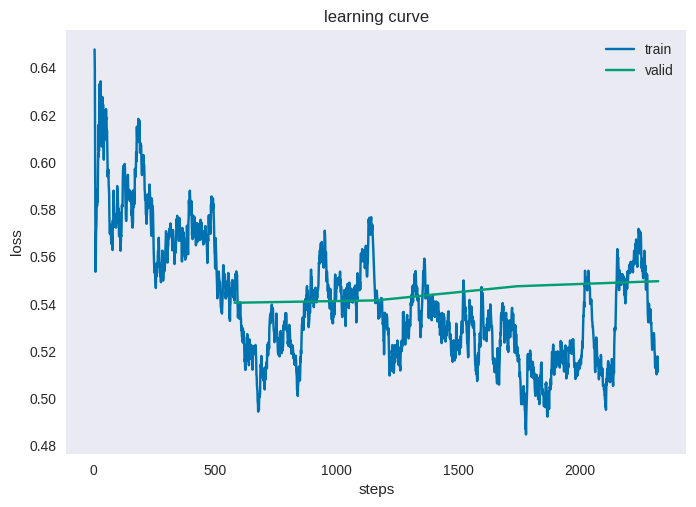

In [22]:
learn.recorder.plot_loss()
learn.load('equivalent_bins_individual_class_backgrounds_model')

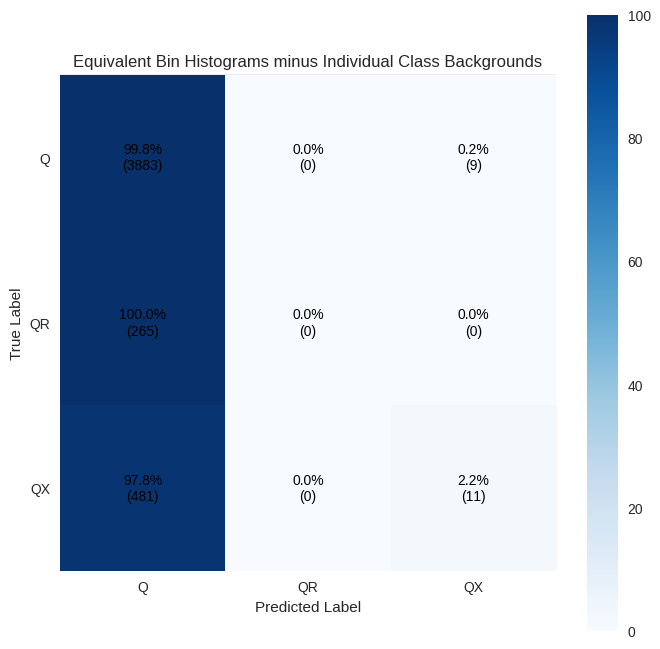

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        textcolour = color = "white" if cm_percent[i, j] > 50 else "black"
        ax.text(j, i, text, ha="center", va="center", color="black")

ax.set_title("Equivalent Bin Histograms minus Individual Class Backgrounds")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im)
plt.show()

In [24]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       0.84      1.00      0.91      3892
          QR       0.00      0.00      0.00       265
          QX       0.55      0.02      0.04       492

    accuracy                           0.84      4649
   macro avg       0.46      0.34      0.32      4649
weighted avg       0.76      0.84      0.77      4649



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


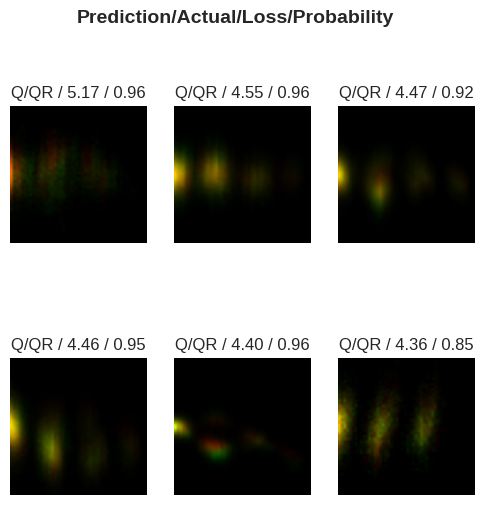

In [25]:
interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

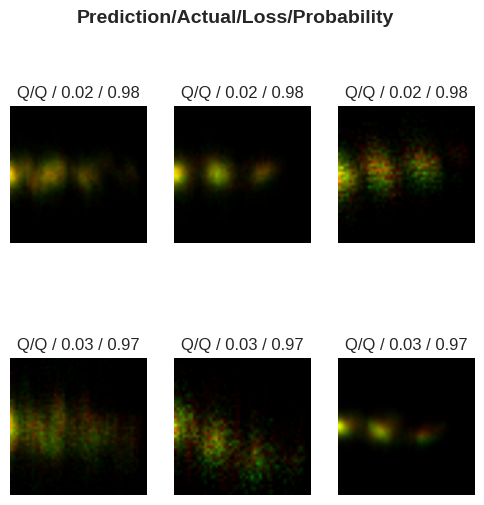

In [26]:
interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss

NameError: name 'Q_max_background' is not defined

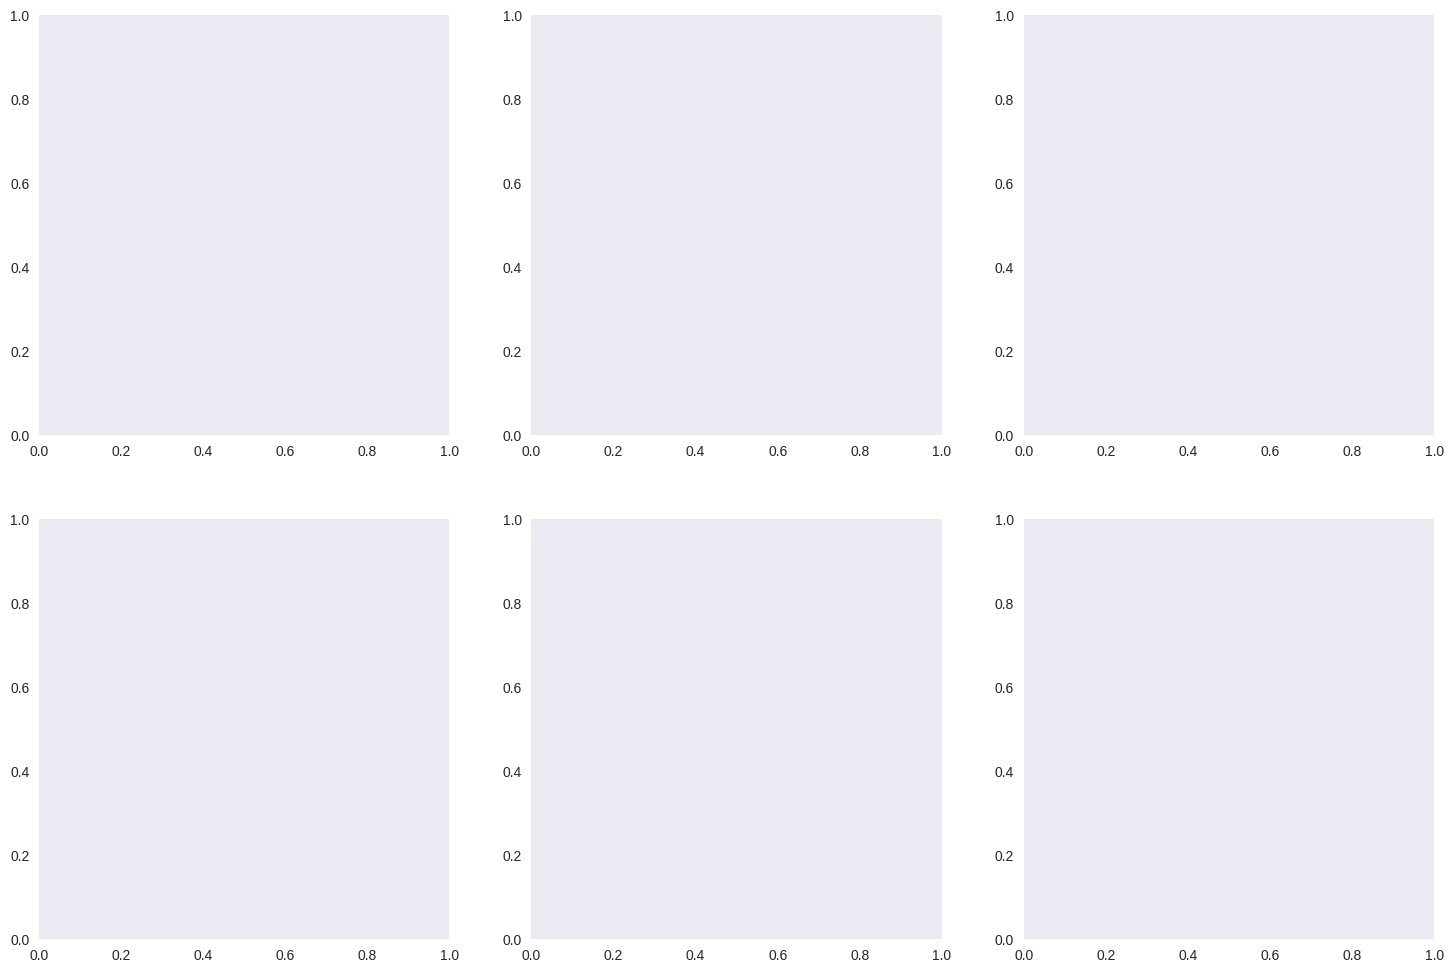

In [27]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

max_backgrounds = [Q_max_background, QR_max_background, QX_max_background]
total_densities = [background.sum() / 2 for background in max_backgrounds]
background_titles = [f'Q Max Background ({total_densities[0]:.0%} of original image density)',
                     f'QR Max Background ({total_densities[1]:.0%} of original image density)',
                     f'QX Max Background ({total_densities[2]:.0%} of original image density)']

for ax, max_background, title in zip(axs[0, :], max_backgrounds, background_titles):
    ax.imshow(numpy_to_pil(max_background), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Max Backgrounds')

histograms_max_subtracted = [norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram_minus_max_background'].sum()),
                             norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram_minus_max_background'].sum()),
                             norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram_minus_max_background'].sum())]

for ax, hist in zip(axs[1, :], histograms_max_subtracted):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Stacked Equivalent Binned Histograms minus Max Backgrounds')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('What do the overall max backgrounds look like?', size=18, y=1)

plt.tight_layout()

In [ ]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


random_objects = [dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].sample(1)]
histograms = [obj['histogram'].iloc[0] for obj in random_objects]
max_subtracted_histograms = [obj['histogram_minus_max_background'].iloc[0] for obj in random_objects]

titles = [f"Q: {random_objects[0]['name'].iloc[0]}", f"QR: {random_objects[1]['name'].iloc[0]}", f"QX: {random_objects[2]['name'].iloc[0]}"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


for ax, hist, title in zip(axs[0, :], histograms, titles):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Unaltered Histogram')

for ax, hist in zip(axs[1, :], max_subtracted_histograms):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Histograms minus Max Background')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('Random Equivalent Binned Unaltered and Max-Subtracted Histograms', size=18, y=1)

plt.tight_layout()

# Trying this with Resnet18

In [ ]:
learn = vision_learner(dls, resnet18, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [ ]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_individual_class_backgrounds_resnet18_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

In [ ]:
learn.recorder.plot_loss()
learn.load('equivalent_bins_individual_class_backgrounds_resnet18_model')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        textcolour = color = "white" if cm_percent[i, j] > 50 else "black"
        ax.text(j, i, text, ha="center", va="center", color="black")

ax.set_title("Equivalent Bin Histograms minus Individual Class Backgrounds")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im)
plt.show()

In [ ]:
def fit_model(df: pd.DataFrame, data_column_name: str, label_column_name: str,
              model, batch_size: int, validation_percentage: float):
    dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=lambda r: numpy_to_pil(r[data_column_name]),
    get_y=lambda r: r[label_column_name],
    splitter=RandomSplitter(valid_pct=validation_percentage),
    item_tfms=Resize(224)
    )

    dls = dblock.dataloaders(df, bs=batch_size)
    dls.show_batch(max_n=9, ax=show_batch_ax)

    learn = vision_learner(dls, model, metrics=[accuracy, error_rate])
    lr_min = learn.lr_find(show_plot=True)

    learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_individual_class_backgrounds_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

    learn.recorder.plot_loss()
    learn.load('equivalent_bins_individual_class_backgrounds_model')



    interp = ClassificationInterpretation.from_learner(learn)
    cm = interp.confusion_matrix()
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

    # Add text annotations
    for i in range(len(cm_percent)):
        for j in range(len(cm_percent[i])):
            text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
            textcolour = color = "white" if cm_percent[i, j] > 50 else "black"
            ax.text(j, i, text, ha="center", va="center", color="black")

    ax.set_title("Equivalent Bin Histograms minus Individual Class Backgrounds")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_xticks(range(len(interp.vocab)))
    ax.set_yticks(range(len(interp.vocab)))
    ax.set_xticklabels(interp.vocab)
    ax.set_yticklabels(interp.vocab)
    plt.colorbar(im)
    plt.show()

    preds, targets = learn.get_preds()

    pred_classes = preds.argmax(dim=1)

    # Generate the report
    report = classification_report(targets, pred_classes, target_names=dls.vocab)
    print(report)

    interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

    interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss


print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [ ]:
type(resnet34)

function